## 판다스를 사용하기 위한 패키지 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## 1. 객채 생성
값을 가지고 있는 리스트를 통해 Series를 만들고, 정수로 만들어진 인덱스를 기본값으로 불러오자.

In [5]:
s = pd.Series([1, 2, 3, 6, 8, np.nan]) # Series를 정의할 때 pd.Series() 함수를 이용하는데, Python의 list나 numpy의 array가 인자로 된다.

In [6]:
s # 출력

0    1.0
1    2.0
2    3.0
3    6.0
4    8.0
5    NaN
dtype: float64

datetime 인덱스와 레이블이 있는 열을 가지고 있는 numpy 배열을 전달하여 데이터프레임을 만들자.

**pd.date_range()** 함수를 쓰면 날짜/시간을 일일히 입력할 필요없이 시작일과 종료일 또는
시작일과 기간을 입력하면 범위 내의 인덱스를 생성해준다.

In [7]:
date = pd.date_range("20190801", periods = 6) # dara_range()함수를 사용해서 시작일을 2019-08-01로 시작해서 Periods를 사용해서 6번(2019-08-06까지 자동으로 생성)

In [8]:
date # 출력

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06'],
              dtype='datetime64[ns]', freq='D')

**DataFrame()**를 이용하여 랜덤 난수를 생성하고, 행의 이름을 A, B, C, D로 생성하자.

In [9]:
df = pd.DataFrame(np.random.randn(6, 4), index = date, columns = list("ABCD"))

행이 6, 열이 4 이므로 **np.random.randn**을 6, 4로 이용하여 랜덤난수를 생성하고, 인덱스는 **date**, 행의 이름을 **A, B, C, D**로 생성

In [10]:
df # 출력

,A,B,C,D
2019-08-01,-0.001821,1.136318,-0.212192,0.335208
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264
2019-08-04,-0.297056,0.576387,-1.072282,1.116366
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760
2019-08-06,0.925067,-0.093671,0.397192,-2.134656


Series와 같은 것으로 변환할 수 있는 객체들의 dict로 구성된 데이터 프레임을 만들어보자.

In [11]:
df2 = pd.DataFrame({"A" : 1.,
                            "B" : pd.Timestamp("20190803"), # B의 모두 2019-08-03을 대입하고,
                            "C" : pd.Series(1, index = list(range(4)), dtype = "float32"), # C에 1을 대입한 뒤, 실수 타입으로 해놓은다.
                            "D" : np.array([3] * 4, dtype = "int32"), # D에 모두 3을 대입하고 정수 타입으로 해놓은다.
                            "E" : pd.Categorical(["test", "train", "test", "train"]), # E에 test, train, test, train을 대입한다.
                            "F" : "too"}) # F에 모두 too를 대입한다.

                                    <위 코드의 함수 정리>
                                    
                          cut : 실수 값의 경계선을 지정하는 경우
                          Timestamp는 타임스탬프 형식의 시계열 자료를 다루기 위한 인덱스이다. 
                          Categorical은 cut 명령을 반환하는 클래스 객체이다.
                          Series은 Python의 list나 numpy의 array가 인자로 된다.

In [12]:
df2 # 실행

,A,B,C,D,E,F
0,1.0,2019-08-03,1.0,3,test,too
1,1.0,2019-08-03,1.0,3,train,too
2,1.0,2019-08-03,1.0,3,test,too
3,1.0,2019-08-03,1.0,3,train,too


데이터프레임 결과물의 열은 다양한 **데이터 타입 (dtypes)**으로 구성된다.

In [13]:
df2.dtypes

A           float64
B    datetime64[ns]
C           float32
D             int32
E          category
F            object
dtype: object

## 2. 데이터 확인하기

데이터프레임의 가장 윗 줄과 마지막 줄을 확인하고 싶을 때에 사용하는 방법은 다음과 같다.

역자 주: 괄호() 안에는 숫자가 들어갈 수도 있고 안 들어갈 수도 있다. 숫자가 들어간다면, 윗 / 마지막 줄의 특정 줄을 불러올 수 있다. 숫자가 들어가지 않다면, 기본값인 5로 처리된다.

In [14]:
df.tail() # 끝에서 마지막 5줄을 출력한다.

,A,B,C,D
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264
2019-08-04,-0.297056,0.576387,-1.072282,1.116366
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760
2019-08-06,0.925067,-0.093671,0.397192,-2.134656


In [15]:
df.tail(3) # 끝에서 마지막 3줄을 출력한다.

,A,B,C,D
2019-08-04,-0.297056,0.576387,-1.072282,1.116366
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760
2019-08-06,0.925067,-0.093671,0.397192,-2.134656


In [16]:
df.head() # 첫 번째에서 5줄을 출력한다.

,A,B,C,D
2019-08-01,-0.001821,1.136318,-0.212192,0.335208
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264
2019-08-04,-0.297056,0.576387,-1.072282,1.116366
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760


In [17]:
df.index # DataFrame의 인덱스 확인

DatetimeIndex(['2019-08-01', '2019-08-02', '2019-08-03', '2019-08-04',
               '2019-08-05', '2019-08-06'],
              dtype='datetime64[ns]', freq='D')

In [18]:
df.columns # DataFrame의 컬럼 확인

Index(['A', 'B', 'C', 'D'], dtype='object')

In [19]:
df.values # 안에 들어있는 numpy데이터를 확인

array([[-1.82064181e-03,  1.13631838e+00, -2.12191577e-01,
         3.35207842e-01],
       [ 7.84536410e-01,  2.32398142e-01, -8.89879050e-01,
         3.65244951e-01],
       [-1.39555012e+00,  6.95026062e-01,  7.37814932e-03,
        -1.74263746e-01],
       [-2.97056338e-01,  5.76387025e-01, -1.07228174e+00,
         1.11636573e+00],
       [-2.51806726e-01, -3.26359355e-01,  1.03192158e+00,
        -9.43760010e-01],
       [ 9.25067115e-01, -9.36712511e-02,  3.97191836e-01,
        -2.13465559e+00]])

In [20]:
df.describe() # df.describe()는 데이터의 대략적인 통계적 정보 요약을 보여준다.

,A,B,C,D
count,6.000000,6.000000,6.000000,6.000000
mean,-0.039438,0.370017,-0.122977,-0.239310
std,0.843934,0.539319,0.789764,1.151193
min,-1.395550,-0.326359,-1.072282,-2.134656
25%,-0.285744,-0.012154,-0.720457,-0.751386
50%,-0.126814,0.404393,-0.102407,0.080472
75%,0.587947,0.665366,0.299738,0.357736
max,0.925067,1.136318,1.031922,1.116366


위 코드의 함수에서 **describe()** 메소드는 생성했던 DataFrame의 간단한 통계 정보를 보여준다. **컬럼별로 데이터의 개수(count), 데이터의 평균 값(mean), 표준 편차(std), 최솟값(min), 4분위수(25%, 50%, 75%), 그리고 최댓값(max)들의 정보를 알 수 있다.**

In [21]:
df.T # T()는 DataFrame에서 index와 column을 바꾼형태의 DataFrame이다.

,2019-08-01 00:00:00,2019-08-02 00:00:00,2019-08-03 00:00:00,2019-08-04 00:00:00,2019-08-05 00:00:00,2019-08-06 00:00:00
A,-0.001821,0.784536,-1.395550,-0.297056,-0.251807,0.925067
B,1.136318,0.232398,0.695026,0.576387,-0.326359,-0.093671
C,-0.212192,-0.889879,0.007378,-1.072282,1.031922,0.397192
D,0.335208,0.365245,-0.174264,1.116366,-0.943760,-2.134656


In [22]:
df.sort_index(axis = 1, ascending = False) # 축 별로 정렬한다.

,D,C,B,A
2019-08-01,0.335208,-0.212192,1.136318,-0.001821
2019-08-02,0.365245,-0.889879,0.232398,0.784536
2019-08-03,-0.174264,0.007378,0.695026,-1.395550
2019-08-04,1.116366,-1.072282,0.576387,-0.297056
2019-08-05,-0.943760,1.031922,-0.326359,-0.251807
2019-08-06,-2.134656,0.397192,-0.093671,0.925067


                                                                     <위 코드의 함수 알아보기>
                            위 코드의 sort_index()는 메소드로 행과 열 이름을 정렬해서 나타낼 수도있다. 
                            
      정렬할 대상 축을 결정할 때에는 axis를 이용한다. axis = 0(디폴트) 이라고 써주면 인덱스를 기준으로 정렬하고 axis = 1라고 써 주면 컬럼이 기준이다.
      
      정렬의 방향은 ascending를 이용한다. ascending = True는 오름차순(디폴트)이고, 반대로 False는 내림차순 이다.

## 3. 데이터 선택하기

## Getting (데이터 얻기)

df.A 와 동일한 Series를 생성하는 단일 열을 선택

In [23]:
df["A"] # 특정 컬럼의 값들만 출력하고 싶으면 이 코드를 실행한다. 이는 df.A와 동일하다. 

2019-08-01   -0.001821
2019-08-02    0.784536
2019-08-03   -1.395550
2019-08-04   -0.297056
2019-08-05   -0.251807
2019-08-06    0.925067
Freq: D, Name: A, dtype: float64

In [24]:
df[0:3] # 0, 1, 2 행을 가져온다.

,A,B,C,D
2019-08-01,-0.001821,1.136318,-0.212192,0.335208
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264


In [25]:
 df["20190801" : "20190805"] # 인덱스를 직접 넣어서 해당하는 "행 범위" 를 가져올 수 있다.

,A,B,C,D
2019-08-01,-0.001821,1.136318,-0.212192,0.335208
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264
2019-08-04,-0.297056,0.576387,-1.072282,1.116366
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760


라벨의 이름을 이용하여 선택할 수 있는 **.loc** 를 사용할 수 있다. 아래 코드 외에도 **df.loc[20190801]** 로도 사용가능하다.

In [26]:
df.loc[date[0]]

A   -0.001821
B    1.136318
C   -0.212192
D    0.335208
Name: 2019-08-01 00:00:00, dtype: float64

In [27]:
df.loc[:, ["A", "B"]] # 컬럼 "A"와 "B"에 대한 모든 값 출력

,A,B
2019-08-01,-0.001821,1.136318
2019-08-02,0.784536,0.232398
2019-08-03,-1.395550,0.695026
2019-08-04,-0.297056,0.576387
2019-08-05,-0.251807,-0.326359
2019-08-06,0.925067,-0.093671


In [28]:
df.loc["20190801" : "20190805", ["A", "B"]] # 인덱스 2019-08-01 부터 2019-08-05 까지의 컬럼 A와 B의 값 출력

,A,B
2019-08-01,-0.001821,1.136318
2019-08-02,0.784536,0.232398
2019-08-03,-1.395550,0.695026
2019-08-04,-0.297056,0.576387
2019-08-05,-0.251807,-0.326359


**lioc** 는 인덱스 번호를 이용하여 데이터를 선택 할 수 있다. **인덱스 번호는 0부터 시작하므로 첫 번째는 0, 두 번째는 1이다.**

In [29]:
df.iloc[2] # 세 번째 행 출력

A   -1.395550
B    0.695026
C    0.007378
D   -0.174264
Name: 2019-08-03 00:00:00, dtype: float64

In [30]:
df.iloc[1:3, 0:4] # 행의 인덱스는 1:3 이므로 두 번째 행과 네 번째 행을 선택하고, 열의 엔덱스는 0:4 이므로 첫 번째와 다섯 번째 열을 출력한다.

,A,B,C,D
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264


In [31]:
df.iloc[[1, 2, 4], [0, 2]] # 두 번째, 세 번째 다섯 번째 행과, 첫 번째, 세 번째 열을 선택

,A,C
2019-08-02,0.784536,-0.889879
2019-08-03,-1.395550,0.007378
2019-08-05,-0.251807,1.031922


명시적으로 행이나 열 선택 인자에 **:** 슬라이스를 전달하면 다음과 같이 행 또는 열 전체를 가져올 수 있다.

In [32]:
df.iloc[1:3, :] # 명시적으로 행을 나눈다.

,A,B,C,D
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-03,-1.395550,0.695026,0.007378,-0.174264


In [33]:
df.iloc[:, 1:3] # 명시적으로 열을 나눈다.

,B,C
2019-08-01,1.136318,-0.212192
2019-08-02,0.232398,-0.889879
2019-08-03,0.695026,0.007378
2019-08-04,0.576387,-1.072282
2019-08-05,-0.326359,1.031922
2019-08-06,-0.093671,0.397192


In [34]:
df.iloc[1,1] # 값 하나를 선택하기 위해서는 특정 행과 열을 지정하는 방식이다.

0.23239814187796456

In [35]:
df.iat[1,1] # 스칼라 값을 빠르게 얻는 방법이다. (위 코드와 동일)

0.23239814187796456

## 조건을 이용하여 선택하기 (Boolean Indexing)

특정한 열의 값들을 기준으로 조건을 만들어 해당 조건에 만족하는 행만 선택 할 수 있다.

In [36]:
df[df.A > 0] # df안에 A가 0보다 큰 것만 출력

,A,B,C,D
2019-08-02,0.784536,0.232398,-0.889879,0.365245
2019-08-06,0.925067,-0.093671,0.397192,-2.134656


In [37]:
df > 0 # df가 0보다 크면 True, 반대로 0보다 작으면 False 출력

,A,B,C,D
2019-08-01,False,True,False,True
2019-08-02,True,True,False,True
2019-08-03,False,True,True,False
2019-08-04,False,True,False,True
2019-08-05,False,False,True,False
2019-08-06,True,False,True,False


In [38]:
df [df > 0] # df가 0보다 클 때 출력하고, 반대로 0보다 작으면 NaN출력

,A,B,C,D
2019-08-01,NaN,1.136318,NaN,0.335208
2019-08-02,0.784536,0.232398,NaN,0.365245
2019-08-03,NaN,0.695026,0.007378,NaN
2019-08-04,NaN,0.576387,NaN,1.116366
2019-08-05,NaN,NaN,1.031922,NaN
2019-08-06,0.925067,NaN,0.397192,NaN


In [39]:
df2 = df.copy() # df를 복사해서 df2에 붙여넣는다.

In [40]:
df2['E'] = ['one', 'one', 'two', 'two', 'three', 'three'] # E에 one, one, two, two, three, three를 넣는다.

In [41]:
df2 # 출력

,A,B,C,D,E
2019-08-01,-0.001821,1.136318,-0.212192,0.335208,one
2019-08-02,0.784536,0.232398,-0.889879,0.365245,one
2019-08-03,-1.395550,0.695026,0.007378,-0.174264,two
2019-08-04,-0.297056,0.576387,-1.072282,1.116366,two
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760,three
2019-08-06,0.925067,-0.093671,0.397192,-2.134656,three


필터링을 해야 하는 경우에는 **.isin()** 이라는 메소드도 있다. 아래와 같이 새로운 열 하나를 추가한 후 추가된 열에 들어있는 값 기준으로 행을 선택가능

In [42]:
df2[df2["E"].isin(["two", "three"])] # df2안에 E가 two, three인 것만 출력

,A,B,C,D,E
2019-08-03,-1.395550,0.695026,0.007378,-0.174264,two
2019-08-04,-0.297056,0.576387,-1.072282,1.116366,two
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760,three
2019-08-06,0.925067,-0.093671,0.397192,-2.134656,three


## 데이터 변경하기(설정)

데이터 프레임의 특정 값을 다른 값으로 변경이 가능하다

In [43]:
s1 = pd.Series([1, 2, 3, 4, 5, 6], index = pd.date_range("20190803", periods = 6)) # 2019-08-03을 기준으로 1~6까지 대입

위 코드와 같이 새로운 열을 추가하고 싶을 때에는 인덱스를 가진 시리즈 하나를 데이터 프레임의 열 하나를 지정하여 넣어준다.

In [44]:
s1 # 출력

2019-08-03    1
2019-08-04    2
2019-08-05    3
2019-08-06    4
2019-08-07    5
2019-08-08    6
Freq: D, dtype: int64

In [45]:
df["F"] = s1 # df에 "F"를 새로 추가하고 2019-08-03을 기준으로 s1을 대입

In [46]:
df

,A,B,C,D,F
2019-08-01,-0.001821,1.136318,-0.212192,0.335208,NaN
2019-08-02,0.784536,0.232398,-0.889879,0.365245,NaN
2019-08-03,-1.395550,0.695026,0.007378,-0.174264,1.0
2019-08-04,-0.297056,0.576387,-1.072282,1.116366,2.0
2019-08-05,-0.251807,-0.326359,1.031922,-0.943760,3.0
2019-08-06,0.925067,-0.093671,0.397192,-2.134656,4.0


In [47]:
df.at[date[0], "A"] = 0 # 특정 값 하나를 선택해서 다른 값으로 변경

In [48]:
df.iat[0,1] = 0 # 위치(인덱스 번호)를 이용해서 변경

In [49]:
df.loc[:, "D"] = np.array([5] * len(df)) # 여러 값을 한꺼번에 바꾸고 싶을 때는 데이터의 크기만 잘 맞춰주면 된다. numpy의 array를 이용한 방법이다.

In [50]:
df # Series에 존재하지 않는 인덱스의 값은 NaN으로 채워진다.

,A,B,C,D,F
2019-08-01,0.000000,0.000000,-0.212192,5,NaN
2019-08-02,0.784536,0.232398,-0.889879,5,NaN
2019-08-03,-1.395550,0.695026,0.007378,5,1.0
2019-08-04,-0.297056,0.576387,-1.072282,5,2.0
2019-08-05,-0.251807,-0.326359,1.031922,5,3.0
2019-08-06,0.925067,-0.093671,0.397192,5,4.0


In [51]:
df2 = df.copy() # df를 복사해서 df2에 붙여넣기

df2[df2 >0] = -df2 # df2가 0보다 큰 것만 뽑아내는 대신에 -df2니까 반대로 작은 것만 출력한다.

In [52]:
df2

,A,B,C,D,F
2019-08-01,0.000000,0.000000,-0.212192,-5,NaN
2019-08-02,-0.784536,-0.232398,-0.889879,-5,NaN
2019-08-03,-1.395550,-0.695026,-0.007378,-5,-1.0
2019-08-04,-0.297056,-0.576387,-1.072282,-5,-2.0
2019-08-05,-0.251807,-0.326359,-1.031922,-5,-3.0
2019-08-06,-0.925067,-0.093671,-0.397192,-5,-4.0


## 4. Missing Data (결측치)

Pandas는 결측치를 표현하기 위해서 **np.nan** 값을 사용한다. 이 방법은 디폴트지만 **연산에서 제외한다.**

**reindex** 으로 지정된 축 상의 인덱스를 **변경** / **추가** / **삭제** 를 할 수 있다. **reindex 는 데이터의 복사본을 반환한다.**

In [53]:
df1 = df.reindex(index = date[0:4], columns = list(df.columns) + ["E"])
df1.loc[date[0]:date[1], "E"] = 1

In [54]:
df1

,A,B,C,D,F,E
2019-08-01,0.000000,0.000000,-0.212192,5,NaN,1.0
2019-08-02,0.784536,0.232398,-0.889879,5,NaN,1.0
2019-08-03,-1.395550,0.695026,0.007378,5,1.0,NaN
2019-08-04,-0.297056,0.576387,-1.072282,5,2.0,NaN


결측치가 하나라도 존재하는 행들을 버리고 싶을 때는 **dropna()** 메소드를 이용한다.

In [55]:
df.dropna() # NaN이 하나라도 들어간 행은 다 지운다.

,A,B,C,D,F
2019-08-03,-1.395550,0.695026,0.007378,5,1.0
2019-08-04,-0.297056,0.576387,-1.072282,5,2.0
2019-08-05,-0.251807,-0.326359,1.031922,5,3.0
2019-08-06,0.925067,-0.093671,0.397192,5,4.0


결측치가 있는 부분을 다른 값으로 채우고 싶다면 **fillna()** 메소드를 이용한다.

In [56]:
df1.fillna(value = 5) # 결측치가 있는 값을 모두 5로 채운다.

,A,B,C,D,F,E
2019-08-01,0.000000,0.000000,-0.212192,5,5.0,1.0
2019-08-02,0.784536,0.232398,-0.889879,5,5.0,1.0
2019-08-03,-1.395550,0.695026,0.007378,5,1.0,5.0
2019-08-04,-0.297056,0.576387,-1.072282,5,2.0,5.0


해당 값이 결측치인지 아닌지 여부를 알고싶다면 **isna()** 메소드를 이용한다.

In [57]:
pd.isna(df1) # 결측치이면 True, 반대로 값이 있다면 False로 나타낸다.

,A,B,C,D,F,E
2019-08-01,False,False,False,False,True,False
2019-08-02,False,False,False,False,True,False
2019-08-03,False,False,False,False,False,True
2019-08-04,False,False,False,False,False,True


## 5.연산 (Operations)

일반적으로 연산은 결측치를 제외한 후 연산된다.

## 통계 (Stats)

In [58]:
df.mean() # 평균 구하기. 

A   -0.039135
B    0.180630
C   -0.122977
D    5.000000
F    2.500000
dtype: float64

아래의 코드에서 **mean()** 함수의 인자로 1을 주게 되면 **컬럼이 아닌 인덱스를 기준으로 연산을 한다.**

In [59]:
df.mean(1)

2019-08-01    1.196952
2019-08-02    1.281764
2019-08-03    1.061371
2019-08-04    1.241410
2019-08-05    1.690751
2019-08-06    2.045718
Freq: D, dtype: float64

아래에 코드에서 **shif** 란? **shif 연산을 사용하면 인덱스는 그대로 두고 데이터만 이동할 수 있다**

In [60]:
s = pd.Series([1, 2, 3, np.nan, 4, 5], index = date).shift(2) # 기존 데이터 프레임의 인덱스가 2019-08-03, 04, 05 인 컬럼에 1.0, 2.0, 3.0를 빼준 값이 결과로 나온다. 
# 또한 결측치가 존재하는 경우에는 계산이 불가능 하므로 NaN 으로 표시된가는 것도 알 수 있다.

In [61]:
s # 출력

2019-08-01    NaN
2019-08-02    NaN
2019-08-03    1.0
2019-08-04    2.0
2019-08-05    3.0
2019-08-06    NaN
Freq: D, dtype: float64

# 함수 적용 (Apply)

**데이터프레임에 함수를 적용할 수 있다. 기존에 존재하는 함수를 사용하거나 사용자가 정의한 람다 함수를 사용할 수도 있다.**

**cumsum** 함수는 배열에서 주어진 축에 따라 누적되는 원소들의 누적 합을 계산하는 함수이다.

In [62]:
df.apply(np.cumsum)

,A,B,C,D,F
2019-08-01,0.000000,0.000000,-0.212192,5,NaN
2019-08-02,0.784536,0.232398,-1.102071,10,NaN
2019-08-03,-0.611014,0.927424,-1.094692,15,1.0
2019-08-04,-0.908070,1.503811,-2.166974,20,3.0
2019-08-05,-1.159877,1.177452,-1.135053,25,6.0
2019-08-06,-0.234810,1.083781,-0.737861,30,10.0


**lambda** 는 **익명 함수로 간단하게 함수를 만들어서 사용할 때 사용된다.**

In [63]:
df.apply(lambda x: x.max() - x.min())

A    2.320617
B    1.021385
C    2.104203
D    0.000000
F    3.000000
dtype: float64

## 히스토그램 구하기 (Histogramming)
**데이터의 값들을 빈도를 조사하여 히스토그램을 만들 수 있다.**
https://pandas.pydata.org/pandas-docs/stable/getting_started/basics.html#basics-discretization 에서 참고하자.

In [64]:
s = pd.Series(np.random.randint(0, 7, size = 10)) # 0부터 7까지 랜덤숫자를 추출하고, 0부터 9까지 10개를 뽑는다.

In [65]:
s # 출력

0    3
1    3
2    1
3    6
4    1
5    4
6    2
7    3
8    2
9    5
dtype: int32

**value_counts()** 란? 각각의 value가 몇 개 있는지 확인해주는 메소드이다.

In [66]:
s.value_counts() # s 변수의 value 갯수 확인

3    3
2    2
1    2
6    1
5    1
4    1
dtype: int64

## 문자열 관련 메소드(String Methods)

**Series는 배열의 각 요소에 쉽게 적용이 가능하도록 str 이라는 속성에 문자열 처리 할 수 있는 여러가지의 메소드들을 갖추고 있다.**

**★문자열의 패턴 일치 확인은 기본적으로 정규표현식을 사용하고, 몇몇 경우에는 항상 정규표현식을 사용함에 유의하자★**

In [67]:
s = pd.Series(["A", "B", "C", "ABC", "CBA", np.nan, "BAC", "CAB"])

In [68]:
s.str.lower()

0      a
1      b
2      c
3    abc
4    cba
5    NaN
6    bac
7    cab
dtype: object

## 합치기 (Merge)

**다양한 정보를 담은 자료들이 있을 때 이들을 합쳐 새로운 자료를 만들어야 할 때가 있다. 시리즈(Series) 또는 데이터프레임(DataFrame)을 어떻게 합치는지 알아보자.**

                            같은 형태 자료들을 이어서 하나로 만들어주는 concat ,
                            다른 형태의 자료들을 한 컬럼을 기준으로 합추는 merge , 
                            기존 데이터 프레임에 하나의 행을 추가하는 append 의 사용법을 알아보자.

# Concat (연결)

**결합(join)** / **병합(merge)** 형태의 연산에 대한 인덱스, 관계 대수 기능을 위한 다양한 형태의 논리를 포함한 **Series**, **데이터프레임**, **Panel**   객체를 손쉽게 결합할 수 있도록 하는 다양한 기능을 Pandas에서 제공한다.

In [69]:
df = pd.DataFrame(np.random.randn(10, 4)) # 랜덤 난수를 생성한 후, 10 X 4 형태의 데이터 프레임 만들기

In [70]:
df # 출력

,0,1,2,3
0,0.199613,-0.350589,0.255312,0.905179
1,-0.942633,-0.243923,0.000482,-1.552427
2,0.133171,0.045660,0.468964,-0.312311
3,-1.046080,-0.347431,-0.346008,-0.396925
4,1.189064,0.443405,-0.223518,1.208941
5,2.206040,0.012915,-0.758629,-1.922261
6,0.750268,1.249922,0.658562,0.295402
7,-1.698810,-0.299378,-0.792906,-0.808826
8,-0.045588,-0.972794,2.720773,-0.631222
9,0.560042,0.823515,0.891612,-0.487317


In [71]:
pie = [df[:3], df[3:7], df[7:]] # df를 세 부분으로 나눈 후, pie에 대입

In [72]:
pd.concat(pie) # concat()를 이용하여 원래대로 다시 합침

,0,1,2,3
0,0.199613,-0.350589,0.255312,0.905179
1,-0.942633,-0.243923,0.000482,-1.552427
2,0.133171,0.045660,0.468964,-0.312311
3,-1.046080,-0.347431,-0.346008,-0.396925
4,1.189064,0.443405,-0.223518,1.208941
5,2.206040,0.012915,-0.758629,-1.922261
6,0.750268,1.249922,0.658562,0.295402
7,-1.698810,-0.299378,-0.792906,-0.808826
8,-0.045588,-0.972794,2.720773,-0.631222
9,0.560042,0.823515,0.891612,-0.487317


# Join (결합)

**데이터베이스에서 사용하는 SQL 스타일의 합치기 기능이다. merge 메소드를 통해 이루어진다.**

In [73]:
left = pd.DataFrame({'Key' : ['one', 'two'], 'lval' : [1, 2]}) # Key에 one, two를 넣고, lval에 1, 2를 넣는다.
right = pd.DataFrame({"Key" : ["one", "two"], "lval" : [3, 4]}) # Key에 one, two를 넣고, lval에 3, 4를 넣는다.

In [74]:
left

,Key,lval
0,one,1
1,two,2


In [75]:
right

,Key,lval
0,one,3
1,two,4


In [76]:
pd.merge(left, right, on = "Key") # Key를 기준으로 left와 right를 합친다.

,Key,lval_x,lval_y
0,one,1,3
1,two,2,4


# Append (추가)

**데이터프레임에 행을 추가한다.**

In [77]:
df = pd.DataFrame(np.random.randn(8, 4), columns = ["A", "B", "C", "D"])

위 코드 **np.random.randn(8, 4)** 는 8개의 열에 랜덤난수를 생성하고, 4개의 행에 랜덤난수를 생성한다.
**rand 명령은 0과 1사이의 난수를 발생시킨다.**

In [78]:
df # 출력

,A,B,C,D
0,-1.087755,1.276497,-0.328306,-0.493073
1,-1.773935,0.564933,0.530947,1.287205
2,-0.517584,-0.532772,-0.763934,1.093042
3,0.107567,-0.331914,0.677398,-0.137243
4,1.396531,-1.700291,-2.067028,0.470298
5,0.753958,-2.409886,-1.556696,0.661450
6,-1.287476,1.252742,0.747452,1.073659
7,0.961753,-0.708850,-1.270678,1.497657


In [79]:
s = df.iloc[3] # df에 3번째 행을 가져와서 s에 넣는다.

In [80]:
s # 출력

A    0.107567
B   -0.331914
C    0.677398
D   -0.137243
Name: 3, dtype: float64

In [81]:
df.append(s, ignore_index = True) # append()를 이용해서 df와 s를 결합한 뒤, ignore_index = True를 이용해 인덱스 이름을 무시함.

,A,B,C,D
0,-1.087755,1.276497,-0.328306,-0.493073
1,-1.773935,0.564933,0.530947,1.287205
2,-0.517584,-0.532772,-0.763934,1.093042
3,0.107567,-0.331914,0.677398,-0.137243
4,1.396531,-1.700291,-2.067028,0.470298
5,0.753958,-2.409886,-1.556696,0.661450
6,-1.287476,1.252742,0.747452,1.073659
7,0.961753,-0.708850,-1.270678,1.497657
8,0.107567,-0.331914,0.677398,-0.137243


# 7.그룹화 (Grouping) 

**그룹화 (Group by)** 는 다음과 같은 처리를 하는 과정들을 지칭한다.

**1. 어떠한 기준을 바탕으로 데이터를 나누는 일 (Splitting)**

**2. 각 그룹에 어떤 함수를 독립적으로 적용시키는 일 (applying)**

**3. 적용되어 나온 결과들을 통합하는 일 (combining)**

In [82]:
df = pd.DataFrame( # 데이터 프레임 생성
{
    "A" : ["too", "bar", "too", "bar", "too", "bar", "too", "bar"],
    "B" : ["one", "two", "three", "one", "two", "three", "four", "four"],
    "C" : np.random.randn(8),
    "D" : np.random.randn(8)
}) 

In [83]:
df

,A,B,C,D
0,too,one,-0.736263,0.558663
1,bar,two,-0.848956,-0.642721
2,too,three,0.116909,-0.185648
3,bar,one,0.271137,-0.750044
4,too,two,-0.161932,-2.504401
5,bar,three,-0.329973,1.418891
6,too,four,0.697815,0.944509
7,bar,four,0.117714,0.664227


A 컬럼의 값을 기준으로 그룹을 묶은다음, 각 그룹에 합계를 구하는 **sum()** 함수를 적용해 보자.

In [84]:
df.groupby("A").sum() # 인덱스로는 A 컬럼이 되고, 합계를 구할 수 있는 C 와 D 컬럼에 있는 숫자들의 합계가 구해진 데이터프레임

,C,D
A,,
bar,-0.790078,0.690353
too,-0.083470,-1.186878


In [85]:
df.groupby(["A", "B"]).sum() # 여러 열을 기준으로 그룹화하면 계층적 인덱스가 형성된다. 여기에도 sum()을 적용할 수 있다.

C         D
A   B                        
bar four   0.117714  0.664227
    one    0.271137 -0.750044
    three -0.329973  1.418891
    two   -0.848956 -0.642721
too four   0.697815  0.944509
    one   -0.736263  0.558663
    three  0.116909 -0.185648
    two   -0.161932 -2.504401

# 8. 변형하기 (Reshaping)
**데이터 프레임을 다른 형태로 변형하는 방법**

# Stack (스택)

**Stack 메소드**는 데이터 프레임의 컬럼들을 인덱스의 레벨로 만든다. 이를 **"압축"** 한다고 표현한다. 

아래의 코드를 보면 **df2** 라는 데이터프레임은 A와 B 컬럼을 갖고 있었지만, stack 메소드를 통해 A와 B라는 값을 가지는 인덱스 레벨이 하나 더 추가되었다.

In [86]:
tuples = list(zip(*[["bar", "bar", "bta", "bta", # zip은 김밥을 생각하면 되는데 당근, 햄 넣고 두개를 동시에 자른다고 생각하면된다.
                    "foo", "too", "foo", "too",],
                   ["one", "two", "two", "one",
                   "two", "one", "two", "one"]]))

In [87]:
index = pd.MultiIndex.from_tuples(tuples, names = ["first", "second"]) # 튜플인덱스를 멀티 인덱스로 변환

In [88]:
df = pd.DataFrame(np.random.randn(8, 2), index = index, columns = ["A", "B"])

In [89]:
df = df[:4]

In [90]:
df

A         B
first second                    
bar   one     0.801817 -1.316455
      two     0.352317  1.486126
bta   two     0.271087  1.169468
      one    -0.920687  0.244151

In [91]:
stacked = df2.stack() # stack() 메소드를 통해 데이터프레임 열들의 계층을 "압축"

In [92]:
stacked # 출력

2019-08-01  A    0.000000
            B    0.000000
            C   -0.212192
            D   -5.000000
2019-08-02  A   -0.784536
            B   -0.232398
            C   -0.889879
            D   -5.000000
2019-08-03  A   -1.395550
            B   -0.695026
            C   -0.007378
            D   -5.000000
            F   -1.000000
2019-08-04  A   -0.297056
            B   -0.576387
            C   -1.072282
            D   -5.000000
            F   -2.000000
2019-08-05  A   -0.251807
            B   -0.326359
            C   -1.031922
            D   -5.000000
            F   -3.000000
2019-08-06  A   -0.925067
            B   -0.093671
            C   -0.397192
            D   -5.000000
            F   -4.000000
dtype: float64

**stack()** 메소드를 통해 압축된 수준을 갖는 데이터프레임은 다시 **unstack()** 메소드를 통해 원래대로 돌아올 수 있다.
기본적으로 **unstack() 메소드는 stack() 메소드를 통해 압축되었던 마지막 수준부터 풀어주는 기능을 갖는다.**

In [93]:
stacked.unstack()

,A,B,C,D,F
2019-08-01,0.000000,0.000000,-0.212192,-5.0,NaN
2019-08-02,-0.784536,-0.232398,-0.889879,-5.0,NaN
2019-08-03,-1.395550,-0.695026,-0.007378,-5.0,-1.0
2019-08-04,-0.297056,-0.576387,-1.072282,-5.0,-2.0
2019-08-05,-0.251807,-0.326359,-1.031922,-5.0,-3.0
2019-08-06,-0.925067,-0.093671,-0.397192,-5.0,-4.0


# 피벗 테이블 (Pivot Tables)

**피벗테이블(Pivot Table)이란 데이터 열 중에서 두 개의 열을 각각 행 인덱스, 열 인덱스로 사용하여 데이터를 조회하여 펼쳐놓은 것**

In [94]:
df = pd.DataFrame({"A" : ["one", "two", "one", "one"] *3,
                          "B" : ["A", "B", "C"] *4,
                          "C" : ["Too", "Too", "Too", "Bar", "Bar", "Bar"] *2,
                          "D" : np.random.randn(12),
                          "E" : np.random.randn(12)})

In [95]:
df

,A,B,C,D,E
0,one,A,Too,0.123940,0.974943
1,two,B,Too,-0.086454,0.083168
2,one,C,Too,-1.051393,0.766866
3,one,A,Bar,-1.079406,0.226638
4,one,B,Bar,-0.151603,-1.425379
5,two,C,Bar,-1.042751,0.866749
6,one,A,Too,-0.181818,1.170966
7,one,B,Too,0.926163,-0.541775
8,one,C,Too,-0.641142,0.317864
9,two,A,Bar,-0.911578,-0.174076


위에 있는 데이터로부터 아래와 같이 피벗 테이블을 쉽게 생성할 수 있다.

In [96]:
pd.pivot_table(df, values = "D", index = ["A", "B"], columns = ["C"]) # 찾지 못한 값은 NaN으로 표시된다.

C           Bar       Too
A   B                    
one A -1.079406 -0.028939
    B  0.177505  0.926163
    C  0.655739 -0.846268
two A -0.911578       NaN
    B       NaN -0.086454
    C -1.042751       NaN

# 9.시계열 데이터 다루기 (Time Series)

**Pandas는 자주일어나는 변환(5분마다 일어나는 데이터 변환)사이에 수행하는 리샘플링 연산을 위한 간단하고, 강력하며, 효율적인 함수를 제공한다.
이는 특히 금융데이터를 다룰 때 마우 흔히 하는 연산이다.**

frep = "S"는 Secend를 말하고, **Day = D** , **Year = Y** 등 이 있다.

In [97]:
abc = pd.date_range("08/08/2019", periods = 100, freq = "S")

In [98]:
abc

DatetimeIndex(['2019-08-08 00:00:00', '2019-08-08 00:00:01',
               '2019-08-08 00:00:02', '2019-08-08 00:00:03',
               '2019-08-08 00:00:04', '2019-08-08 00:00:05',
               '2019-08-08 00:00:06', '2019-08-08 00:00:07',
               '2019-08-08 00:00:08', '2019-08-08 00:00:09',
               '2019-08-08 00:00:10', '2019-08-08 00:00:11',
               '2019-08-08 00:00:12', '2019-08-08 00:00:13',
               '2019-08-08 00:00:14', '2019-08-08 00:00:15',
               '2019-08-08 00:00:16', '2019-08-08 00:00:17',
               '2019-08-08 00:00:18', '2019-08-08 00:00:19',
               '2019-08-08 00:00:20', '2019-08-08 00:00:21',
               '2019-08-08 00:00:22', '2019-08-08 00:00:23',
               '2019-08-08 00:00:24', '2019-08-08 00:00:25',
               '2019-08-08 00:00:26', '2019-08-08 00:00:27',
               '2019-08-08 00:00:28', '2019-08-08 00:00:29',
               '2019-08-08 00:00:30', '2019-08-08 00:00:31',
               '2019-08-

In [112]:
ts = pd.Series(np.random.randint(0, 500, len(abc)), index = abc) # 0부터 500까지의 랜덤난수를 생성한 뒤, 데이터와 길이는 abc로 해준다.

아래 코드와 같이 **resample()** 연산을 쓰면 시간 간격을 재조정하는 **리샘플링(resampling)** 이 가능하다. 

시간 구간이 작아지면 데이터 양이 증가한다고 해서 **업-샘플링(up-sampling)** 이라 하고,

시간 구간이 커지면 데이터 양이 감소한다고 해서 **다운-샘플링(down-sampling)** 이라고 한다.

In [125]:
ts.resample("5Min").sum() # 25804는 ts변수를 출력했을 때 랜덤난수를 모두 더한 값이다.

2019-08-08    25804
Freq: 5T, dtype: int32

# 타임존 (시간대)표현 :

In [137]:
rng = pd.date_range("8/8/2019 00:00", periods = 5, freq = "D") # periods = 5이니까, 2019-08-08부터 08-12일까지 생성하고, freq가 D이니까 날짜로 생성함.
# 만약 연도로 하고싶으면 Y(Year), 초로 하고싶으면 S(Second) 등으로 표현함.

In [138]:
ts = pd.Series(np.random.randn(len(rng)), rng)

In [139]:
ts # 출력

2019-08-08    1.297463
2019-08-09   -0.391843
2019-08-10   -0.440682
2019-08-11    0.420515
2019-08-12   -0.413555
Freq: D, dtype: float64

In [165]:
ts_utc = ts.tz_localize("UTC")

In [166]:
ts_utc

2019-08-08 00:00:00+00:00    1.297463
2019-08-09 00:00:00+00:00   -0.391843
2019-08-10 00:00:00+00:00   -0.440682
2019-08-11 00:00:00+00:00    0.420515
2019-08-12 00:00:00+00:00   -0.413555
Freq: D, dtype: float64

# 다른 타임존 (시간대)으로 변경 :

In [172]:
ts_utc.tz_convert("US/Eastern")

2019-08-07 20:00:00-04:00    1.297463
2019-08-08 20:00:00-04:00   -0.391843
2019-08-09 20:00:00-04:00   -0.440682
2019-08-10 20:00:00-04:00    0.420515
2019-08-11 20:00:00-04:00   -0.413555
Freq: D, dtype: float64

# 시간 표현 ↔ 기간 표현으로 변환 :

In [173]:
rng = pd.date_range("8/8/2019", periods = 5, freq = "M") # 2019-08월 부터 시작해서, freq가 M(months)이니까 월로 표현하고, periods가 5이니까 12월 까지 표현

In [175]:
ts = pd.Series(np.random.randn(len(rng)), index = rng)

In [176]:
ts

2019-08-31   -0.532376
2019-09-30    0.099758
2019-10-31    0.986848
2019-11-30   -0.963959
2019-12-31    0.938032
Freq: M, dtype: float64

In [177]:
ps = ts.to_period() # 달 만 표현

In [178]:
ps # 출력

2019-08   -0.532376
2019-09    0.099758
2019-10    0.986848
2019-11   -0.963959
2019-12    0.938032
Freq: M, dtype: float64

In [179]:
ps.to_timestamp()

2019-08-01   -0.532376
2019-09-01    0.099758
2019-10-01    0.986848
2019-11-01   -0.963959
2019-12-01    0.938032
Freq: MS, dtype: float64

기간과 특정시간 사이의 변환에 편리한 산술적 기능을 사용할 수 있다. 아래의 나오는 코드는 11월을 끝으로 하는 4분기 체계에서 각 분기의 마지막 달에 9시간을 더한 시각을 시작으로 하는 체계로 바꾸는 것을 보여준다.

In [190]:
prn = pd.period_range("2000Q1", "2020Q4", freq = "Q-NOV")
ts = pd.Series(np.random.randn(len(prn)), prn)
ts.index = (prn.asfreq("M", "e") +1).asfreq("H", "s") +9
ts.head()

2000-03-01 09:00    0.304470
2000-06-01 09:00    0.694608
2000-09-01 09:00    0.181346
2000-12-01 09:00    1.226723
2001-03-01 09:00    1.596769
Freq: H, dtype: float64

# 10. 그래프로 표현하기 (Plotting)

그래프는 **plot()** 메소드를 통해 그래프를 그릴 수 있다.

In [209]:
ts = pd.Series(np.random.randn(1000), # 랜덤 난수 1000개를 생성하고,
              index = pd.date_range("8/8/2019", # 2019-08-08 부터,
                                   periods = 1000)) # periods는 1000이니까 8월 8일부터 1000일까지 즉, 2022-05-03까지 표현

In [210]:
ts = ts.cumsum() # 누적된 합계 표현

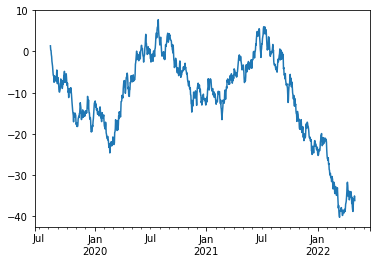

In [211]:
ts.plot() # ts 변수를 plot()함수를 넣어서 그래프로 표현

**plot()** 메소드는 여러 개의 열을 한 번에 그릴 수 있는 편리함도 제공하고 있다.

아래 코드와 같이 A, B, C, D의 4개의 열에 해당하는 데이터를 legend와 함께 표현할 수 있다.

In [213]:
df = pd.DataFrame(np.random.randn(1000, 4), # 4개의 행, 1000개의 열
                 index = ts.index, # 데이터는 ts변수를 불러오고,
                 columns = ["A", "B", "C", "D"]) # 4개의 행 이름은 A, B, C, D로 지정

In [214]:
df = df.cumsum() # 누적된 합계 표현

아래 코드의 함수 정리 :

**plt.figure() : 새로운 그래프를 그리는 함수**

**df.plot() : df변수 의 그래프를 그래는 함수**

**plt.legend() : 범례를 그래프에 넣어주는 함수**

<Figure size 432x288 with 0 Axes>

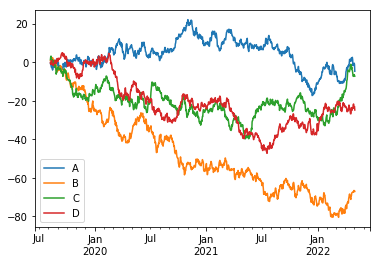

In [219]:
plt.figure(); df.plot(); plt.legend(loc = "best")

# 11.데이터 입출력 (Getting Data In/Out)

# CSV

데이터 프레임을 CSV 형식으로 저장하기.

In [221]:
df.to_csv("too.csv") # too.csv파일로 저장한다. 경로는 기본적으로 C:\Users\USER 에 저장된다.

csv파일을 불러들여서 읽기.

In [222]:
pd.read_csv("too.csv") # 기본적으로 C:\Users\USER 경로에 저장되어 있어야 한다.

,Unnamed: 0,A,B,C,D
0,2019-08-08,-0.606283,0.747514,1.289559,-0.221121
1,2019-08-09,-1.109114,1.062657,2.744839,-1.195501
2,2019-08-10,-1.645509,1.000087,3.105683,-0.278497
3,2019-08-11,-2.628208,2.504065,1.329226,0.393273
4,2019-08-12,-2.590933,1.220918,1.547890,0.897592
5,2019-08-13,-3.002735,0.495810,0.444578,-0.952850
6,2019-08-14,-1.547566,1.309882,1.028196,-0.925267
7,2019-08-15,-4.125862,2.315028,0.882703,-1.422915
8,2019-08-16,-3.079400,1.593520,-1.483858,-1.249238
9,2019-08-17,-2.395874,0.967483,-0.658113,-1.101175


# HDF5

HDF5 형식으로 저장하기.

In [223]:
df.to_hdf("too.h5", "df") # h5 형식으로 저장된다. 경로는 기본적으로 C:\Users\USER 에 있다.

HDF5 형식 데이터를 불러들이고, 읽어오기.

In [224]:
pd.read_hdf("too.h5", "df") # 기본적으로 C:\Users\USER 경로에 저장되어 있어야 한다.

,A,B,C,D
2019-08-08,-0.606283,0.747514,1.289559,-0.221121
2019-08-09,-1.109114,1.062657,2.744839,-1.195501
2019-08-10,-1.645509,1.000087,3.105683,-0.278497
2019-08-11,-2.628208,2.504065,1.329226,0.393273
2019-08-12,-2.590933,1.220918,1.547890,0.897592
2019-08-13,-3.002735,0.495810,0.444578,-0.952850
2019-08-14,-1.547566,1.309882,1.028196,-0.925267
2019-08-15,-4.125862,2.315028,0.882703,-1.422915
2019-08-16,-3.079400,1.593520,-1.483858,-1.249238
2019-08-17,-2.395874,0.967483,-0.658113,-1.101175


# Excel

데이터 프레임을 엑셀 파일로 저장하기.

In [225]:
df.to_excel("too.xlsx", sheet_name = "Sheet") # 경로는 기본적으로 C:\Users\USER 에 저장되어 있다.

엑셀 파일을 불러오고, 데이터 프레임 형식으로 읽어오기.

In [226]:
pd.read_excel("too.xlsx", "Sheet", index_col = None, na_values = ["NA"]) # 자기 경로에 저장되어 있어야 한다.

,A,B,C,D
2019-08-08,-0.606283,0.747514,1.289559,-0.221121
2019-08-09,-1.109114,1.062657,2.744839,-1.195501
2019-08-10,-1.645509,1.000087,3.105683,-0.278497
2019-08-11,-2.628208,2.504065,1.329226,0.393273
2019-08-12,-2.590933,1.220918,1.547890,0.897592
2019-08-13,-3.002735,0.495810,0.444578,-0.952850
2019-08-14,-1.547566,1.309882,1.028196,-0.925267
2019-08-15,-4.125862,2.315028,0.882703,-1.422915
2019-08-16,-3.079400,1.593520,-1.483858,-1.249238
2019-08-17,-2.395874,0.967483,-0.658113,-1.101175
